In [47]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [48]:
a = torch.FloatTensor(np.arange(4).reshape(2,2))
a

tensor([[ 0.,  1.],
        [ 2.,  3.]])

In [49]:
torch.from_numpy(np.arange(4).reshape(2, 2))

tensor([[ 0,  1],
        [ 2,  3]], dtype=torch.int32)

In [50]:
a = torch.linspace(-2, 2, 100)
a

tensor([-2.0000, -1.9596, -1.9192, -1.8788, -1.8384, -1.7980, -1.7576,
        -1.7172, -1.6768, -1.6364, -1.5960, -1.5556, -1.5152, -1.4747,
        -1.4343, -1.3939, -1.3535, -1.3131, -1.2727, -1.2323, -1.1919,
        -1.1515, -1.1111, -1.0707, -1.0303, -0.9899, -0.9495, -0.9091,
        -0.8687, -0.8283, -0.7879, -0.7475, -0.7071, -0.6667, -0.6263,
        -0.5859, -0.5455, -0.5051, -0.4646, -0.4242, -0.3838, -0.3434,
        -0.3030, -0.2626, -0.2222, -0.1818, -0.1414, -0.1010, -0.0606,
        -0.0202,  0.0202,  0.0606,  0.1010,  0.1414,  0.1818,  0.2222,
         0.2626,  0.3030,  0.3434,  0.3838,  0.4242,  0.4646,  0.5051,
         0.5455,  0.5859,  0.6263,  0.6667,  0.7071,  0.7475,  0.7879,
         0.8283,  0.8687,  0.9091,  0.9495,  0.9899,  1.0303,  1.0707,
         1.1111,  1.1515,  1.1919,  1.2323,  1.2727,  1.3131,  1.3535,
         1.3939,  1.4343,  1.4747,  1.5152,  1.5556,  1.5960,  1.6364,
         1.6768,  1.7172,  1.7576,  1.7980,  1.8384,  1.8788,  1.9192,
      

In [51]:
b = torch.pow(a, 2) + torch.rand(100)
b

tensor([ 4.5533,  3.9001,  4.4461,  3.6077,  3.6124,  3.7210,  3.6750,
         3.1126,  2.8421,  3.6214,  2.6055,  2.5915,  2.6751,  2.5815,
         2.5460,  2.8066,  2.3068,  1.7395,  2.5777,  1.6998,  2.0829,
         1.6906,  1.5382,  1.3889,  1.2949,  1.8868,  1.1996,  1.6144,
         0.8074,  1.1581,  1.1148,  0.7459,  0.9347,  1.1967,  0.8051,
         0.9187,  0.5430,  0.3098,  0.2986,  0.8826,  0.4136,  0.8147,
         0.6916,  0.4253,  0.5672,  0.7718,  0.9483,  0.1029,  0.6780,
         0.2886,  0.1915,  0.1696,  0.7712,  0.9397,  0.9376,  0.4448,
         0.7685,  0.7961,  0.7907,  1.1295,  0.5631,  1.1009,  0.4401,
         1.2066,  0.7568,  1.0678,  0.9972,  0.6769,  1.3832,  1.2767,
         1.3330,  1.0514,  1.2792,  1.3199,  1.1194,  1.4364,  1.1543,
         1.8281,  1.7487,  2.1332,  1.7078,  1.9518,  1.7994,  1.9055,
         2.4065,  2.5708,  2.5497,  2.5420,  2.9483,  2.6319,  3.1895,
         3.0476,  3.4499,  3.4444,  4.2134,  3.8069,  4.1202,  4.1570,
      

In [52]:
a.shape

torch.Size([100])

In [53]:
b.shape

torch.Size([100])

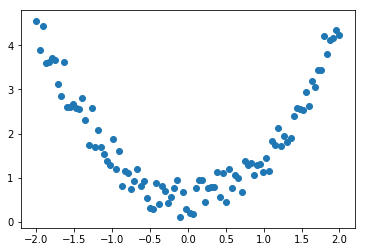

In [54]:
plt.scatter(a.numpy(), b.numpy())
plt.show()

In [55]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fcn1 = torch.nn.Linear(1, 50)
        self.fcn2 = torch.nn.Linear(50, 1)
    def forward(self, x):
        x = self.fcn1(x)
        x = torch.relu(x)
        x = self.fcn2(x)
        return x

In [56]:
net = Net()
net

Net(
  (fcn1): Linear(in_features=1, out_features=50, bias=True)
  (fcn2): Linear(in_features=50, out_features=1, bias=True)
)

In [57]:
net.parameters()

<generator object Module.parameters at 0x0000000009BE1F10>

In [58]:
opti = torch.optim.Adam(net.parameters())
def loss_func(y, y_pre):
    return torch.mean(torch.pow((y - y_pre), 2))

In [59]:
a = a.reshape(100, 1)
b = b.reshape(100, 1)
print(type(a))
type(Variable(a))

<class 'torch.Tensor'>


torch.Tensor

In [45]:
steps = 1000
plt.ion()
for i in range(steps):
    x = Variable(a)
    y = Variable(b)
    pre = net(x)
    loss = loss_func(y, pre)
#     print(loss)
    opti.zero_grad()
    loss.backward()
    opti.step()
    if i % 5 == 10:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x, pre)
        plt.pause(0.5)
        plt.show()
# plt.ioff()

In [44]:
plt.show()